In [1]:
import warnings
warnings.filterwarnings(
    action='ignore',
    category=FutureWarning
)

In [2]:
import FACSPy as fp
import scanpy as sc

In [3]:
dataset = fp.read_dataset(input_dir = "../../Tutorials/mouse_lineages/",
                          file_name = "raw_dataset_stained")

In [4]:
dataset

AnnData object with n_obs × n_vars = 20018950 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining', 'singlets', 'live', 'CD45+'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'gate_frequencies'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [5]:
### our current gating strategy is imported from the FlowJo Workspace
dataset.uns["gating_cols"]

Index(['root/cells', 'root/cells/singlets', 'root/cells/singlets/live',
       'root/cells/singlets/live/CD45+'],
      dtype='object')

In [6]:
### we are only interested in CD45+ cells, so we can subset
fp.subset_gate(dataset,
               gate = "CD45+",
               copy = False)
dataset

AnnData object with n_obs × n_vars = 4757816 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining', 'singlets', 'live', 'CD45+'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'gate_frequencies'
    obsm: 'gating'
    layers: 'compensated', 'transformed'

In [7]:
### synchronizing the dataset sets an actual state that might be important later to not forget to repeat analyses
fp.sync.synchronize_dataset(dataset)

['obs_names']
     ... updated metadata


In [8]:
### for the vignette, we downsample the dataset significantly
sc.pp.subsample(dataset,
                n_obs = 200_000,
                random_state = 187)

In [9]:
### here, we want to use our own gating from CD45+ cells
### the first option is to use only the cluster information and gate manually using clusters

In [10]:
### we set the default layer to use, which are the transformed data
fp.settings.default_layer = "transformed"
### we also set the default gate, which here is CD45+
fp.settings.default_gate = "CD45+"

### from now on, we can skip the gate and layer keywords for the function
### you can however still override these settings by supplying the arguments
### for transparency, gate and layer are supplied explicitly in this vignette

In [11]:
### the clustering and dimensionality reduction is performed as in scanpy
### note that usually, all these function calls would need a gate and layer keyword argument which we set above
### this vignette covers all keyword arguments for transparency

fp.tl.pca(dataset,
          gate = "CD45+", # unnecessary here as it has been set above
          layer = "transformed", # unnecessary here as it has been set above
          use_only_fluo = True, # whether to use only fluorescence channels, default = True
          exclude = None, # list of channels to exclude for analysis
          scaling = None # whether to apply scaling
          )

In [12]:
### we calculate the neighbors for leiden clustering and umap visualization

fp.tl.neighbors(dataset,
                gate = "CD45+", # unnecessary here as it has been set above
                layer = "transformed", # unnecessary here as it has been set above
                use_only_fluo = True, # whether to use only fluorescence channels, default = True
                exclude = None, # list of channels to exclude for analysis
                scaling = None # whether to apply scaling
                )

In [13]:
### we cluster using the leiden algorithm

fp.tl.leiden(dataset,
             gate = "CD45+", # unnecessary here as it has been set above
             layer = "transformed", # unnecessary here as it has been set above
             use_only_fluo = True, # whether to use only fluorescence channels, default = True
             exclude = None, # list of channels to exclude for analysis
             scaling = None # whether to apply scaling
             )

In [14]:
### and finally we compute the UMAP representation for visualization
fp.tl.umap(dataset,
           gate = "CD45+", # unnecessary here as it has been set above
           layer = "transformed", # unnecessary here as it has been set above
           use_only_fluo = True, # whether to use only fluorescence channels, default = True
           exclude = None, # list of channels to exclude for analysis
           scaling = None # whether to apply scaling
           )

In [15]:
### we have added "X_pca_CD45+_transformed" to the .obsm slot as PCA coordinates as well as settings/variances etc to other slots
### also, leiden clustering information are stored in the obs
### umap coordinates are stored in the obsm slot
### all performed operations are saved with the gate and the underlying data as flow analysis often uses analysis of multiple gates

dataset

AnnData object with n_obs × n_vars = 200000 × 20
    obs: 'sample_ID', 'file_name', 'organ', 'genotype', 'sex', 'experiment', 'age', 'staining', 'singlets', 'live', 'CD45+', 'CD45+_transformed_leiden'
    var: 'pns', 'png', 'pne', 'pnr', 'type', 'pnn', 'cofactors'
    uns: 'metadata', 'panel', 'workspace', 'gating_cols', 'dataset_status_hash', 'cofactors', 'raw_cofactors', 'cofactor_table', 'gate_frequencies', 'settings', 'pca_CD45+_transformed', 'CD45+_transformed_neighbors', 'CD45+_transformed_leiden', 'umap_CD45+_transformed'
    obsm: 'gating', 'X_pca_CD45+_transformed', 'X_umap_CD45+_transformed'
    varm: 'pca_CD45+_transformed'
    layers: 'compensated', 'transformed'
    obsp: 'CD45+_transformed_neighbors_connectivities', 'CD45+_transformed_neighbors_distances'

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


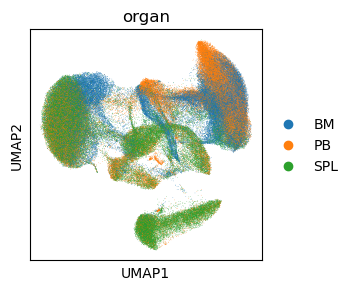

In [16]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "organ")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


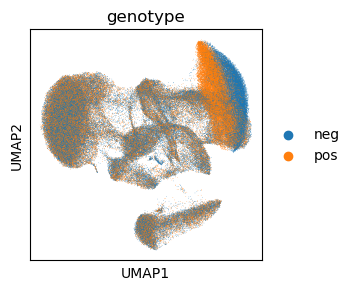

In [17]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "genotype")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


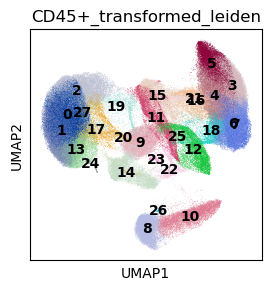

In [18]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD45+_transformed_leiden",
           legend_loc = "on data")

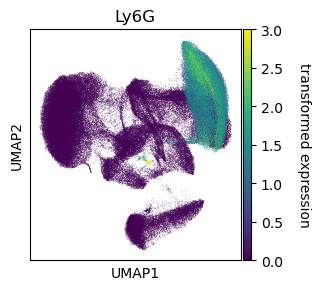

In [19]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "Ly6G",
           vmin = 0,
           vmax = 3)

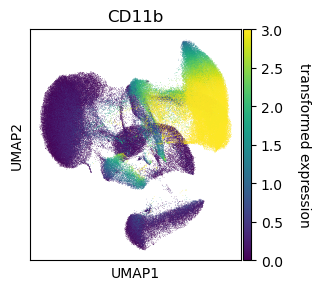

In [20]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD11b",
           vmin = 0,
           vmax = 3)

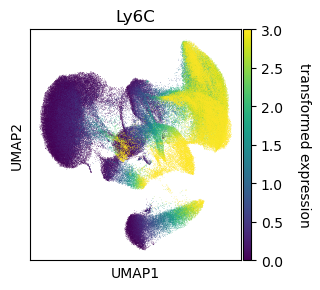

In [21]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "Ly6C",
           vmin = 0,
           vmax = 3)

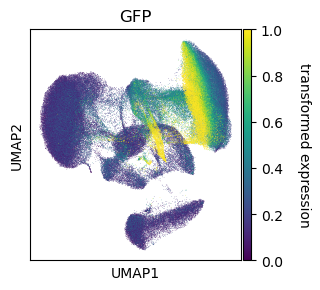

In [22]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "GFP",
           vmin = 0,
           vmax = 1)

In [23]:
### the other way is to gate via the unsupervisedGating class

In [24]:
dataset.var.loc["Siglec-F", "pns"] = "Siglec_F"
dataset.var.index = dataset.var["pns"].tolist()
dataset.var

,pns,png,pne,pnr,type,pnn,cofactors
FSC-A,FSC-A,1.0,"(0.0, 0.0)",262144,scatter,FSC-A,1.0
FSC-H,FSC-H,1.0,"(0.0, 0.0)",262144,scatter,FSC-H,1.0
FSC-W,FSC-W,1.0,"(0.0, 0.0)",262144,scatter,FSC-W,1.0
SSC-A,SSC-A,1.0,"(0.0, 0.0)",262144,scatter,SSC-A,1.0
SSC-H,SSC-H,1.0,"(0.0, 0.0)",262144,scatter,SSC-H,1.0
SSC-W,SSC-W,1.0,"(0.0, 0.0)",262144,scatter,SSC-W,1.0
GFP,GFP,1.0,"(0.0, 0.0)",262144,fluo,GFP-A,584.45276
B220,B220,1.0,"(0.0, 0.0)",262144,fluo,APC-A,1805.8206
CD4,CD4,1.0,"(0.0, 0.0)",262144,fluo,APC-H7-A,1060.931
Siglec_F,Siglec_F,1.0,"(0.0, 0.0)",262144,fluo,BV421-A,4914.5923


In [25]:
### the gating strategy is a dictionary
### with the population names as keys
### and a list as values
### where you store the first element as the parent of the population
### and the markers as the second element
### marker with a "+" are considered positive
### markers with a "-" are considered negative
### markers without a "+" or a "-" are also considered positive

gating_strategy = {
    "T_cells": ["CD45+", ["CD3+", "CD45+"]],
    "CD4_T_cells": ["T_cells", ["CD3+", "CD4+", "CD8-", "CD45+"]],
    "CD8_T_cells": ["T_cells", ["CD3+", "CD4-", "CD8+", "CD45+"]],
    "Neutrophils": ["CD45+", ["CD45+", "Ly6G+", "Ly6C+", "CD11b+"]],
    "Monocytes": ["CD45+", ["CD45+", "Ly6C+", "Ly6G-", "CD11b+", "NK1.1-"]],
    "B_cells": ["CD45+", ["CD45+", "B220+"]],
    "NK_cells": ["CD45+", ["CD45+", "NK1.1+"]],
    "Eosinophils": ["CD45+", ["CD45+", "Siglec_F+", "Ly6G-"]]
}

In [26]:
### we setup the classifier...
clf = fp.ml.unsupervisedGating(dataset,
                               gating_strategy = gating_strategy,
                               clustering_algorithm = "leiden", 
                               layer = "transformed",
                               cluster_key = None)

In [27]:
### ... and start the identification
clf.identify_populations()

Analyzing population: T_cells
Analyzing population: CD45+
... sample 21112023_lineage_PB_M9_005.fcs
     ... gating population T_cells
     ... gating population Neutrophils
     ... gating population Monocytes
     ... gating population B_cells
     ... gating population NK_cells
     ... gating population Eosinophils
... sample 22112023_lineage_PB_M14_004.fcs
     ... gating population T_cells
     ... gating population Neutrophils
     ... gating population Monocytes
     ... gating population B_cells
     ... gating population NK_cells
     ... gating population Eosinophils
... sample 22112023_lineage_BM_M15_013.fcs
     ... gating population T_cells
     ... gating population Neutrophils
     ... gating population Monocytes
     ... gating population B_cells
     ... gating population NK_cells
     ... gating population Eosinophils
... sample 21112023_lineage_PB_M11_007.fcs
     ... gating population T_cells
     ... gating population Neutrophils
     ... gating population Monocyt

     ... gating population T_cells
     ... gating population Neutrophils
     ... gating population Monocytes
     ... gating population B_cells
     ... gating population NK_cells
     ... gating population Eosinophils
... sample 21112023_lineage_PB_M8_004.fcs
     ... gating population T_cells
     ... gating population Neutrophils
     ... gating population Monocytes
     ... gating population B_cells
     ... gating population NK_cells
     ... gating population Eosinophils
... sample 21112023_lineage_SPL_M8_020.fcs
     ... gating population T_cells
     ... gating population Neutrophils
     ... gating population Monocytes
     ... gating population B_cells
     ... gating population NK_cells
     ... gating population Eosinophils
... sample 21112023_lineage_SPL_M7_019.fcs
     ... gating population T_cells
     ... gating population Neutrophils
     ... gating population Monocytes
     ... gating population B_cells
     ... gating population NK_cells
     ... gating population 

computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 20112023_lineage_SPL_M1_046.fcs
computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 20112023_lineage_BM_M2_039.fcs
computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 20112023_lineage_BM_M4_041.fcs
computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 22112023_lineage_PB_M16_006.fcs
computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating population CD8_T_cells
... sample 22112023_lineage_BM_M18_016.fcs
computing PCA for leiden
computing neighbors for leiden!
     ... gating population CD4_T_cells
     ... gating 

In [28]:
### we convert the gates to a valid obs_column for display
fp.convert_gate_to_obs(dataset, "T_cells")
fp.convert_gate_to_obs(dataset, "CD4_T_cells")
fp.convert_gate_to_obs(dataset, "CD8_T_cells")
fp.convert_gate_to_obs(dataset, "Neutrophils")
fp.convert_gate_to_obs(dataset, "Monocytes")
fp.convert_gate_to_obs(dataset, "B_cells")
fp.convert_gate_to_obs(dataset, "NK_cells")
fp.convert_gate_to_obs(dataset, "Eosinophils")

In [29]:
fp.settings.default_layer = "transformed"
fp.settings.default_gate = "CD45+"

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


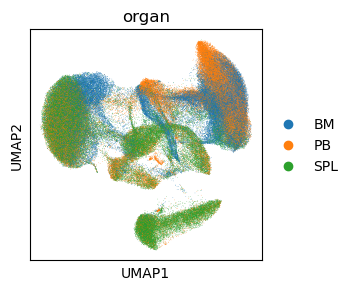

In [30]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "organ")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


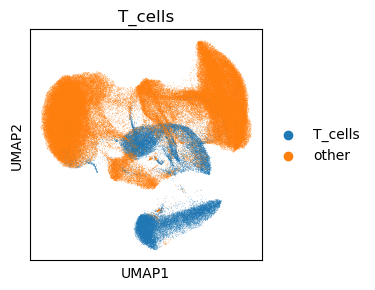

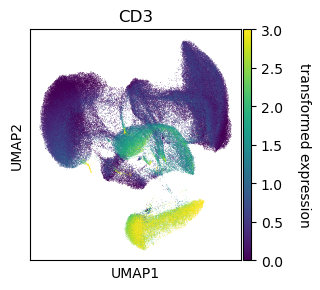

In [31]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "T_cells")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD3",
           vmin = 0,
           vmax = 3)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


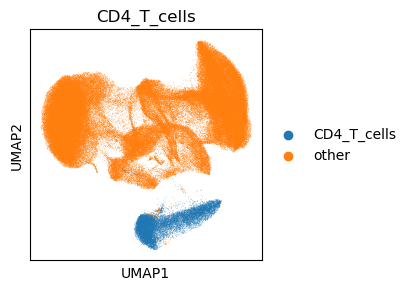

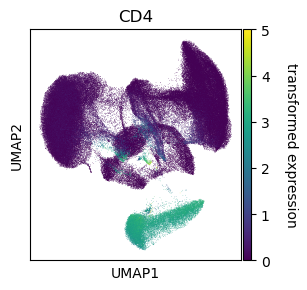

In [32]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD4_T_cells")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD4",
           vmin = 0,
           vmax = 5)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


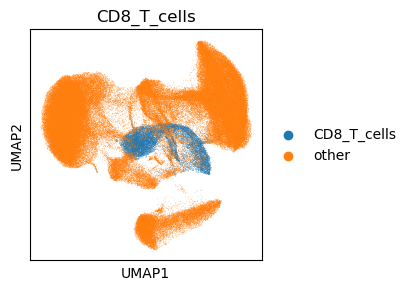

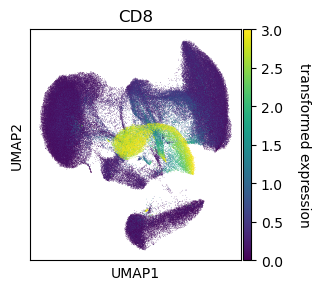

In [33]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD8_T_cells")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD8",
           vmin = 0,
           vmax = 3)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


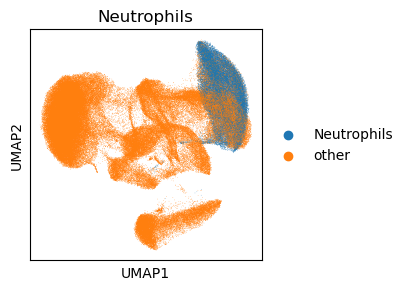

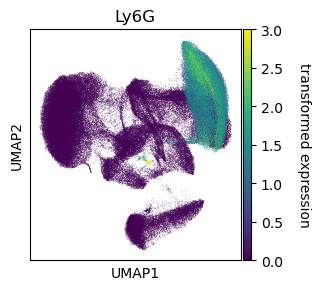

In [34]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "Neutrophils")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "Ly6G",
           vmin = 0,
           vmax = 3)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


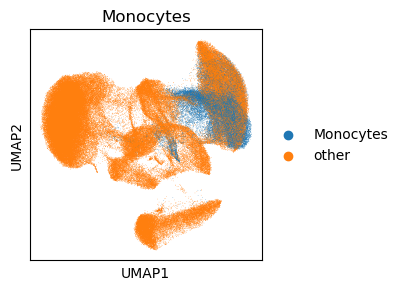

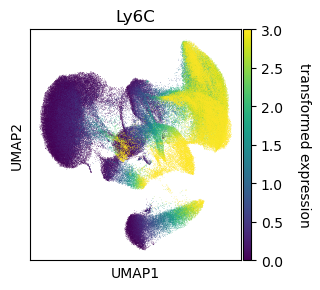

In [35]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "Monocytes")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "Ly6C",
           vmin = 0,
           vmax = 3)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


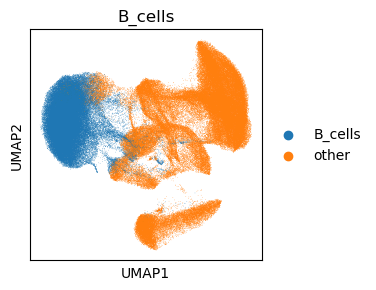

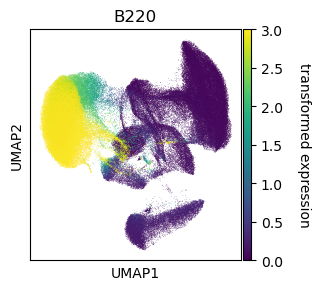

In [36]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "B_cells")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "B220",
           vmin = 0,
           vmax = 3)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


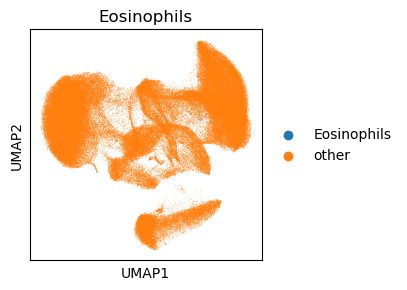

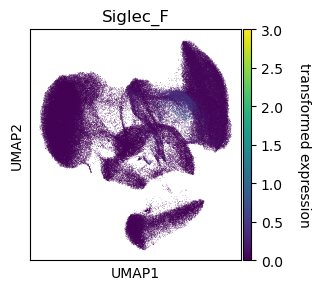

In [37]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "Eosinophils")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "Siglec_F",
           vmin = 0,
           vmax = 3)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


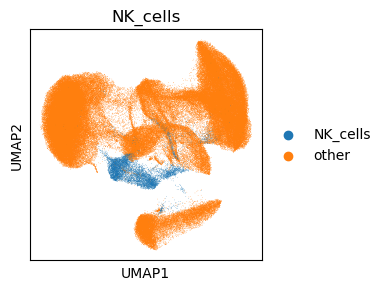

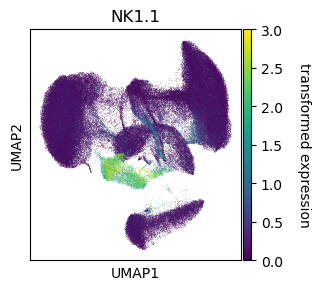

In [38]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "NK_cells")
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "NK1.1",
           vmin = 0,
           vmax = 3)

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


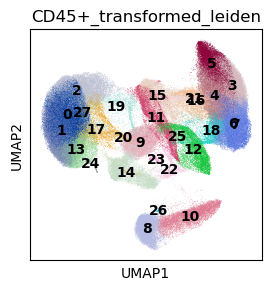

In [39]:
fp.pl.umap(dataset,
           gate = "CD45+",
           layer = "transformed",
           color = "CD45+_transformed_leiden",
           legend_loc = "on data")

In [40]:
fp.tl.mfi(dataset,
          layer = "compensated",
          groupby = "CD45+_transformed_leiden",
          use_only_fluo = True,
          aggregate = True)

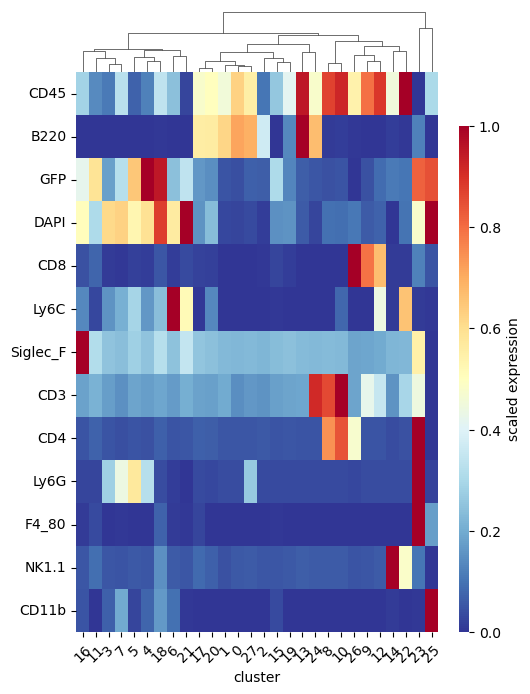

In [41]:
fp.pl.cluster_heatmap(dataset,
                      layer = "compensated",
                      data_group = "CD45+_transformed_leiden",
                      figsize = (5,7),
                      y_label_fontsize = 10,
                      cmap = "RdYlBu_r")

In [42]:
### cluster 11 and 15 are not identifiable, neither by UMAP or by the cluster heatmap.
### we store them as not_identified

fp.convert_cluster_to_gate(dataset,
                           obs_column = "CD45+_transformed_leiden",
                           positive_cluster = ["11", "15"],
                           population_name = "not_identified",
                           parent_name = "CD45+")

In [43]:
fp.convert_gate_to_obs(dataset,
                       "not_identified")

C:\Users\tarik\anaconda3\envs\FACSPypeline\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


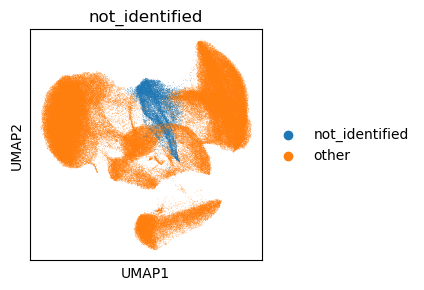

In [44]:
fp.pl.umap(dataset,
           color = "not_identified")

In [45]:
dataset.uns["gating_cols"]

Index(['root/cells', 'root/cells/singlets', 'root/cells/singlets/live',
       'root/cells/singlets/live/CD45+',
       'root/cells/singlets/live/CD45+/T_cells',
       'root/cells/singlets/live/CD45+/Neutrophils',
       'root/cells/singlets/live/CD45+/Monocytes',
       'root/cells/singlets/live/CD45+/B_cells',
       'root/cells/singlets/live/CD45+/NK_cells',
       'root/cells/singlets/live/CD45+/Eosinophils',
       'root/cells/singlets/live/CD45+/T_cells/CD4_T_cells',
       'root/cells/singlets/live/CD45+/T_cells/CD8_T_cells',
       'root/cells/singlets/live/CD45+/not_identified'],
      dtype='object')

In [48]:
fp.save_dataset(dataset,
                output_dir = "../../Tutorials/mouse_lineages/",
                file_name = "raw_dataset_gated",
                overwrite = True)

File saved successfully
